# Building Classifier Dataset

- Building off the work of the previous year's interns

- [2019/2020 Modeling/Findings](https://github.com/BayAreaMetro/Parcel_Building_Classification/blob/master/full_data_generation.ipynb)

- Relevant Datasets:

    1. [Parcel Atlas Parcel Info](https://data.bayareametro.gov/Cadastral/Parcel-Atlas/8zf2-k4u2)

    2. [Parcel Atlas Use Codes](https://data.bayareametro.gov/Cadastral/Parcel-Atlas-Use-Codes/6agh-qq3a)

In [1]:
import pandas as pd
import numpy as np
from shapely import wkt
from shapely.geometry import Point, Polygon, MultiPolygon
import geopandas as gpd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import sys

# local import
sys.path.insert(0, '../Project_1_Policy_Parsing/')
from utils_io import *

ModuleNotFoundError: No module named 'shapely'

## Upload Relevant Information

- Pull following tables from Socrata:
    1. Urbansim (Building Types, Buildings)
    2. ParcelAtlas (has since been updated since last interns)

In [2]:
# https://data.bayareametro.gov/Cadastral/Parcel-Atlas/8zf2-k4u2

socrata_ids = {
    'UrbanSim'    : {'Building_Types' : 'a6fp-zvby',
                     'Building_Info'  : '28t4-cgx4'},
    'ParcelAtlas' : {'Building_Types' : '6agh-qq3a',
                     'Building_Info'  : '8hp3-7hq6'},
}

In [1]:
# query_args = {'select': 'recid, city_name, zn_code, zn_description, regional_lu_class',
#               'where': "city_name='San Francisco'",
#               'limit': 100}

# Columns:
"""'shape', 'parcel_id', 'building_id', 'building_type', 'building_sqft',
       'non_residential_sqft', 'residential_units', 'year_built',
       'assessed_building_value', 'assessed_date', 'last_sale_date',
       'last_sale_price'"""

query_args1 = {'select': '*',
              'limit' : 10000}

query_args2 = {'select' : '*'}

us_df = pull_df_from_socrata(socrata_ids['UrbanSim']['Building_Info'], query_args=query_args1)
labels_df = pull_df_from_socrata(socrata_ids['UrbanSim']['Building_Types'], query_args=query_args2)

NameError: name 'pull_df_from_socrata' is not defined

In [35]:
labels_df.sample(30)

,building_type,building_type_description,building_category,building_category_description,examples,urbansim_comments
15,FP,food processing and wineries,IL,light industrial,"grain storage, stockyard, packing services",NaN
20,MR,mixed use residential focused,MR,mixed use residential focused,NaN,most mixed use default
26,PG,parking garage,PG,parking garage,NaN,NaN
1,HT,townhomes,HT,townhomes,SF attached residence,NaN
14,IL,light industrial,IL,light industrial,"industrial condominiums, quarries/sand/gravel,...",default for industrial unless heavy in descrip...
16,IW,warehouse or logistics,IW,warehouse or logistics,NaN,NaN
19,RB,retail big box or regional,RB,retail big box or regional,NaN,must include something like regional or mega i...
0,HS,single family residential,HS,single family residential,"SF detached residence, manufactured/floating h...",includes ADUs
25,IN,office,OF,institutional,"religious buildings, clubs, community centers,...",NaN
27,VA,vacant now,VA,vacant,"agriculture (livestock, pasture, etc), empty (...",NaN


In [32]:
labels_df['building_type_description'].unique()

array(['single family residential', 'townhomes',
       'multi family residential', 'mobile home', 'single room occupancy',
       'assisted living', 'dorm', 'condo or apt common area', 'office',
       'gov', 'hospital', 'hotel', 'k12 school', 'college or university',
       'light industrial', 'food processing and wineries',
       'warehouse or logistics', 'heavy industrial', 'retail general',
       'retail big box or regional', 'mixed use residential focused',
       'mixed use industrial focused', 'mixed use employment focused',
       'parking lot', 'other or unkown', 'parking garage', 'vacant now',
       'golf course or other low density rec use',
       'vacant permanently such as park or transport net',
       'high end ag and vineyards and orchards', 'retail'], dtype=object)

In [33]:
labels_df['building_category_description'].unique()

array(['single family residential', 'townhomes',
       'multi family residential', 'group quarters', 'vacant permanently',
       'office', 'hotel', 'school', 'light industrial',
       'warehouse or logistics', 'heavy industrial', 'retail general',
       'retail big box or regional', 'mixed use residential focused',
       'mixed use industrial focused', 'mixed use employment focused',
       'vacant', 'other or unknown', 'institutional', 'parking garage',
       'retail food or drink'], dtype=object)

In [30]:
us_df.head(20)

,shape,parcel_id,building_id,building_type,building_sqft,non_residential_sqft,residential_units,year_built,assessed_building_value,assessed_date,last_sale_date,last_sale_price
0,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",AL335894,AL_A074 132109600_B2 AL_A074 132109600_B3_14,HS,1503.0,1503.0,1.0,1985.0,284164.0,2017-05-05 00:00:00,2017-05-05 00:00:00,NaN
1,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",AL338137,AL_A071 025500300_B1_44,IW,NaN,NaN,NaN,NaN,331413.0,NaN,NaN,NaN
2,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",AL329507,AL_A064 422601600_B1_74,HS,2048.0,2048.0,1.0,1924.0,884340.0,NaN,NaN,NaN
3,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",AL368104,AL_A074 129000800_B1_104,HS,2451.0,2451.0,2.0,1905.0,148162.0,NaN,NaN,NaN
4,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",AL336973,AL_A071 023001400_B3 AL_A071 023001400_B2_134,HT,2091.0,2091.0,2.0,1908.0,54261.0,2017-10-31 00:00:00,2017-10-31 00:00:00,NaN
5,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",AL068923,AL_A513 070302300_B2_164,HS,2638.0,2638.0,1.0,1979.0,297247.0,2016-12-27 00:00:00,2016-12-27 00:00:00,NaN
6,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",AL398072,AL_A065 240700602_B1_194,HS,3042.0,3042.0,3.0,1964.0,227609.0,NaN,NaN,NaN
7,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",AL372399,AL_A058 217102201_B1_224,HM,4066.0,4066.0,5.0,NaN,334087.0,NaN,NaN,NaN
8,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",AL392715,AL_A074 047000300_B1_254,HS,1229.0,1229.0,1.0,1944.0,446384.0,NaN,NaN,NaN
9,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",AL323247,AL_A074 107508800_B1_284,HT,1247.0,1247.0,1.0,1973.0,83531.0,NaN,NaN,NaN


# Merge the two databases by building_type

In [76]:
labels_df['building_category_description'].unique()

array(['single family residential', 'townhomes',
       'multi family residential', 'group quarters', 'vacant permanently',
       'office', 'hotel', 'school', 'light industrial',
       'warehouse or logistics', 'heavy industrial', 'retail general',
       'retail big box or regional', 'mixed use residential focused',
       'mixed use industrial focused', 'mixed use employment focused',
       'vacant', 'other or unknown', 'institutional', 'parking garage',
       'retail food or drink'], dtype=object)

In [56]:
us_labels_df = pd.merge(us_df, labels_df, on ='building_type')
us_labels_df.head()

,shape,building_type,building_category_description
0,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",HS,single family residential
1,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",HS,single family residential
2,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",HS,single family residential
3,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",HS,single family residential
4,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",HS,single family residential


# Multi-Polygon Centroid:

- Identify the lat/long centroid of each parcel.

In [71]:
def multipolygon_centroid(x):
    """
    :param: MultiPolygon coordinates
    :return: Numpy array (latitude, longitude) 
    """
    
    coords = np.array(x['coordinates']).squeeze()  # Eliminates unnecessary list nesting
    return np.mean(coords, axis=0)[::-1]  # List is backwards.. We want (latitude, longitude)

In [72]:
us_labels_df['centroid'] = us_labels_df['shape'].map(lambda x: multipolygon_centroid(x))

In [73]:
us_labels_df.head()

,shape,building_type,building_category_description,centroid
0,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",HS,single family residential,"[37.74384381942637, -122.24512020359259]"
1,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",HS,single family residential,"[37.856434406201686, -122.24042096810354]"
2,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",HS,single family residential,"[37.769156607801676, -122.26993410260351]"
3,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",HS,single family residential,"[37.52461115040173, -121.92295941520361]"
4,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",HS,single family residential,"[37.883650447835024, -122.29434380167015]"


## Google API to Convert Centroids into Images

# Exploration of Parcel Atlas

In [9]:
use_codes = socrata_ids['ParcelAtlas']['Building_Types']
parcels = socrata_ids['ParcelAtlas']['Building_Info']

In [ ]:
full_query = {'select': '*'}
pa_df = pull_df_from_socrata(parcels, query_args=full_query)

pulling data in 3 chunks of 1000000 rows each
pulling chunk 0
pulling chunk 1
pulling chunk 2


In [141]:
3+3

6

In [ ]:
pa_df.sample(10000)

In [139]:
pa_df.to_json('atlas_parcels.json', orient='records', lines=True)

In [7]:
query_args1 = {'select': '*',
              'limit' : 10000}

query_args2 = {'select' : '*'}

pa_df = pull_df_from_socrata(parcels, query_args=query_args1)
labels_df = pull_df_from_socrata(use_codes, query_args=query_args2)

pulling data in 1 chunks of 10000 rows each
pulling chunk 0
took 4.4123 seconds
pulling data in 1 chunks of 327 rows each
pulling chunk 0
took 2.296 seconds


In [19]:
pa_df.sample(10)

,objectid,apn,state,county,fips,land_value,impr_value,tot_value,assmt_year,sales_pric,...,no_of_stor,shortowner,ownaddress,attdate,quantarium,sit_zip4,owner2,sit_dir,apn2,ownctystzp
383789,4333873.0,166721,CA,Contra Costa,06013,135252.0,180509.0,315761.0,2018.0,0.0,...,1,MENDIZABAL OBDULIO YOVANY,45 ALAMO AVE,20190815,10287519,1801,NaN,NaN,NaN,NaN
975329,4925443.0,012201390,CA,San Mateo,06081,36225.0,59587.0,95812.0,2019.0,0.0,...,1+B,VENTURINI ANNA M; MEDEGHINI MARIA ANGELA,395 PONDEROSA RD,20190815,19830374,2405,NaN,NaN,323742,SOUTH SAN FRANCISCO CA 94080
1449296,5399419.0,64926013,CA,Santa Clara,06085,238370.0,290019.0,528389.0,2018.0,0.0,...,1,NaN,NaN,20190815,20535381,1319,NaN,NaN,NaN,SAN JOSE CA 95148
1615289,5565403.0,26457041,CA,Santa Clara,06085,287431.0,111405.0,398836.0,2018.0,0.0,...,1,NaN,NaN,20190815,20297006,3142,NaN,NaN,NaN,SAN JOSE CA 95125
1082605,5032578.0,047141240,CA,San Mateo,06081,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213206,NaN
535405,4485529.0,92A-504-43,CA,Alameda,06001,164835.0,384615.0,549450.0,2019.0,740000.0,...,1,OGORZALEK TADEUSZ LESLAW; WANG NINGKUN,36067 HALEY ST,20190815,9694301,1641,NaN,NaN,092A050404300,NEWARK CA 94560
1678742,5628872.0,42408077,CA,Santa Clara,06085,2716255.0,113173.0,2829428.0,2018.0,0.0,...,NaN,NaN,NaN,20190815,20408685,1918,NaN,NaN,NaN,LOS GATOS CA 95032
1774844,5724940.0,50363049,CA,Santa Clara,06085,367200.0,367200.0,734400.0,2018.0,0.0,...,1,NaN,NaN,20190815,20484369,5852,NaN,NaN,NaN,SARATOGA CA 95070
869971,4819980.0,16038205,CA,Marin,06041,562266.0,449812.0,1012078.0,2019.0,0.0,...,NaN,BALSA ANTHONY D; THE BALSA FAMILY TRUST,8 CAPILANO DR,20190815,14148268,5825,NaN,NaN,160-382-05,NaN
2209799,6159948.0,183-120-015,CA,Sonoma,06097,138720.0,208080.0,346800.0,2019.0,0.0,...,2,CURTIN JR CHRISTOPHER J; PETERSON MORGANNE,15 REDWOOD CT,20190815,21263643,3156,NaN,NaN,183120015000,SANTA ROSA CA 95409


In [20]:
labels_df

,code,code_description
0,0010,Miscellaneous (General)
1,0011,Pipeline or Right-of-Way
2,0012,Rail (Right-of-way & track)
3,0013,Road (Right-of-way)
4,0014,Utilities (Right-of-way ONLY)
...,...,...
322,9304,Historical Office
323,9305,Historical Transient Lodging (hotel/motel)
324,9307,"Historical Recreation, Entertainment"
325,9308,"Historical Park, Site, Misc."


In [14]:
na_rates = pa_df.isna().sum() / len(pa_df)

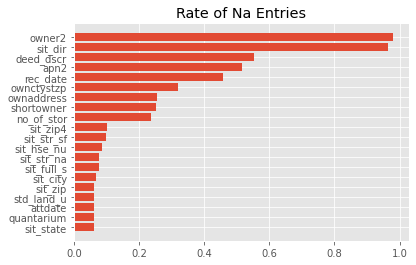

In [15]:
zero_cols = na_rates[na_rates == 0]
nonzero_cols = na_rates[na_rates != 0].sort_values()
plt.barh(nonzero_cols.index.values, nonzero_cols)
plt.title('Rate of Na Entries')
plt.show()

- Inspection shows that many entries have a value of zero. Looking further...

In [16]:
# Roundabout way of grabbing the numerical column titles
pa_stats = pa_df.describe()
num_cols = pa_stats.columns

num_df = pa_df[num_cols].drop(['xcoord', 'ycoord', 'minx', 'miny', 'maxx', 'maxy', 'std_land_u'], axis=1)
num_df.head()

,objectid,land_value,impr_value,tot_value,assmt_year,sales_pric,year_built,lot_size,bldg_area,no_of_unit,bedrooms,bathrooms
0,3950154.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3950155.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3950156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3950157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3950158.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
num_df = num_df.replace(0.0, np.nan)

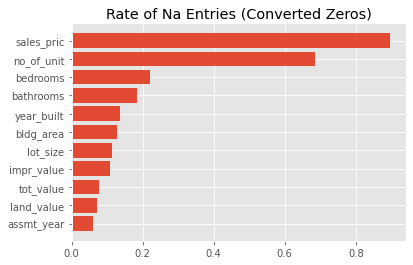

In [18]:
na_rates = num_df.isna().sum() / len(num_df)
zero_cols = na_rates[na_rates == 0]
nonzero_cols = na_rates[na_rates != 0].sort_values()
plt.barh(nonzero_cols.index.values, nonzero_cols)
plt.title('Rate of Na Entries (Converted Zeros)')
plt.show()

# Boxplots for distributions

In [ ]:
plt.boxplot(num_df[~num_df['land_value'].isna()]['land_value'])

In [ ]:
[i for i in axs.flat]

In [ ]:
plt.boxplot(num_df[~num_df['land_value'].isna()]['land_value'].values)

In [ ]:
def normalized(col):
    return (col - col.min()) / (col.max()-col.min())


fig, axs = plt.subplots(4, 3, figsize=(24, 18))


for ax, col in zip(axs.flat, num_df.columns):
    vals = num_df[~num_df[col].isna()][col]
    ax.boxplot(vals)
    ax.set_title(col)
    

# Distribution of Labels (Building_Type):

In [ ]:
plt.hist(us_df[''])

## More to look into:

- Can we somehow merge atlas urbansim to check the consistency of information?

    - in doing so, can we use the images procured from the interns in 2019/2020 to identify columns to train with metadata?

In [136]:
pa_df

,objectid,apn,state,county,fips,land_value,impr_value,tot_value,assmt_year,sales_pric,...,std_land_u,deed_dscr,no_of_stor,shortowner,ownaddress,attdate,quantarium,sit_zip4,owner2,sit_dir
0,3950154.0,87519,CA,Contra Costa,06013,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3950155.0,87509,CA,Contra Costa,06013,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3950156.0,87108,CA,Contra Costa,06013,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3950157.0,87440,CA,Contra Costa,06013,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3950158.0,86518,CA,Contra Costa,06013,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3960002.0,339276,CA,Contra Costa,06013,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,3960003.0,306507,CA,Contra Costa,06013,60330.0,312436.0,372766.0,2018.0,0.0,...,1003.0,NaN,NaN,WANG EDGE; JI YAYING,4833 CALDERWOOD CT,20190815,10009009,3511,NaN,NaN
9997,3960004.0,347513,CA,Contra Costa,06013,43068.0,156312.0,199380.0,2018.0,0.0,...,1008.0,NaN,1,LAWSON WILLIAM C,PO BOX 1235,20190815,10006607,NaN,NaN,NaN
9998,3960005.0,347513,CA,Contra Costa,06013,12894.0,0.0,12894.0,2018.0,0.0,...,8002.0,NaN,NaN,ROMAN CATHOLIC BISHOP OAKLAND,2121 HARRISON ST,20190815,10006615,NaN,NaN,NaN


In [137]:
pa_df[['county', 'xcoord', 'ycoord']]

,county,xcoord,ycoord
0,Contra Costa,-121.535,37.8506
1,Contra Costa,-121.537,37.8485
2,Contra Costa,-121.537,37.8461
3,Contra Costa,-121.538,37.8492
4,Contra Costa,-121.539,37.8408
...,...,...,...
9995,Contra Costa,-121.635,38.0119
9996,Contra Costa,-121.635,37.9853
9997,Contra Costa,-121.635,38.0201
9998,Contra Costa,-121.635,38.0201


- some parcels beyond the rach of google maps